In [1]:
#ML Regression
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#import dataset customer
df_customer= pd.read_csv("D:\INTERNSHIP\Kalbe - Rakamin\Week 4\Case Study Data Scientist\Case Study - Customer.csv", sep=';')
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [3]:
#import dataset product
df_product= pd.read_csv("D:\INTERNSHIP\Kalbe - Rakamin\Week 4\Case Study Data Scientist\Case Study - Product.csv", sep=';')
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [4]:
#import dataset store
df_store= pd.read_csv("D:\INTERNSHIP\Kalbe - Rakamin\Week 4\Case Study Data Scientist\Case Study - Store.csv", sep=';')
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [5]:
#import dataset transaction
df_transaction= pd.read_csv("D:\INTERNSHIP\Kalbe - Rakamin\Week 4\Case Study Data Scientist\Case Study - Transaction.csv", sep=';')
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [6]:
#Data Cleansing
#Detect the missing value of customer
df_customer.isnull()

,CustomerID,Age,Gender,Marital Status,Income
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
442,False,False,False,True,False
443,False,False,False,False,False
444,False,False,False,False,False
445,False,False,False,False,False


In [7]:
#Detect the missing value of product
df_product.isnull()

,ProductID,Product Name,Price
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [8]:
#Detect the missing value of store
df_store.isnull()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [9]:
#Detect the missing value of transaction
df_transaction.isnull()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5015,False,False,False,False,False,False,False,False
5016,False,False,False,False,False,False,False,False
5017,False,False,False,False,False,False,False,False
5018,False,False,False,False,False,False,False,False


In [10]:
# Data Cleansing
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')
# fill missing values
df_customer.isna().sum()
df_customer.fillna(method='ffill', inplace=True)

In [11]:
# Data Merge
merged_df = pd.merge(df_transaction, df_product, on='ProductID', how='left')
merged_df = pd.merge(merged_df, df_store, on='StoreID', how='left')
merged_df = pd.merge(merged_df, df_customer, on='CustomerID', how='left')
merged_df.head

<bound method NDFrame.head of      TransactionID  CustomerID       Date ProductID  Price_x  Qty  \
0          TR11369         328 2022-01-01        P3     7500    4   
1          TR16356         165 2022-01-01        P9    10000    7   
2           TR1984         183 2022-01-01        P1     8800    4   
3          TR35256         160 2022-01-01        P1     8800    7   
4          TR41231         386 2022-01-01        P9    10000    1   
...            ...         ...        ...       ...      ...  ...   
5015       TR54423         243 2022-12-31       P10    15000    5   
5016        TR5604         271 2022-12-31        P2     3200    4   
5017       TR81224          52 2022-12-31        P7     9400    6   
5018       TR85016          18 2022-12-31        P8    16000    3   
5019       TR85684          55 2022-12-31        P8    16000    1   

      TotalAmount  StoreID   Product Name  Price_y       StoreName GroupStore  \
0           30000       12       Crackers     7500  Prestasi

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Product Name    5020 non-null   object        
 9   Price_y         5020 non-null   int64         
 10  StoreName       5020 non-null   object        
 11  GroupStore      5020 non-null   object        
 12  Type            5020 non-null   object        
 13  Latitude        5020 non-null   object        
 14  Longitude       5020 non-null   object        
 15  Age 

In [13]:
#checking
merged_df.duplicated().sum()


0

In [14]:
#Regression
df_regression = merged_df.groupby(['Date']).agg({'Qty':
                                                 'sum'}).reset_index()
df_regression

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


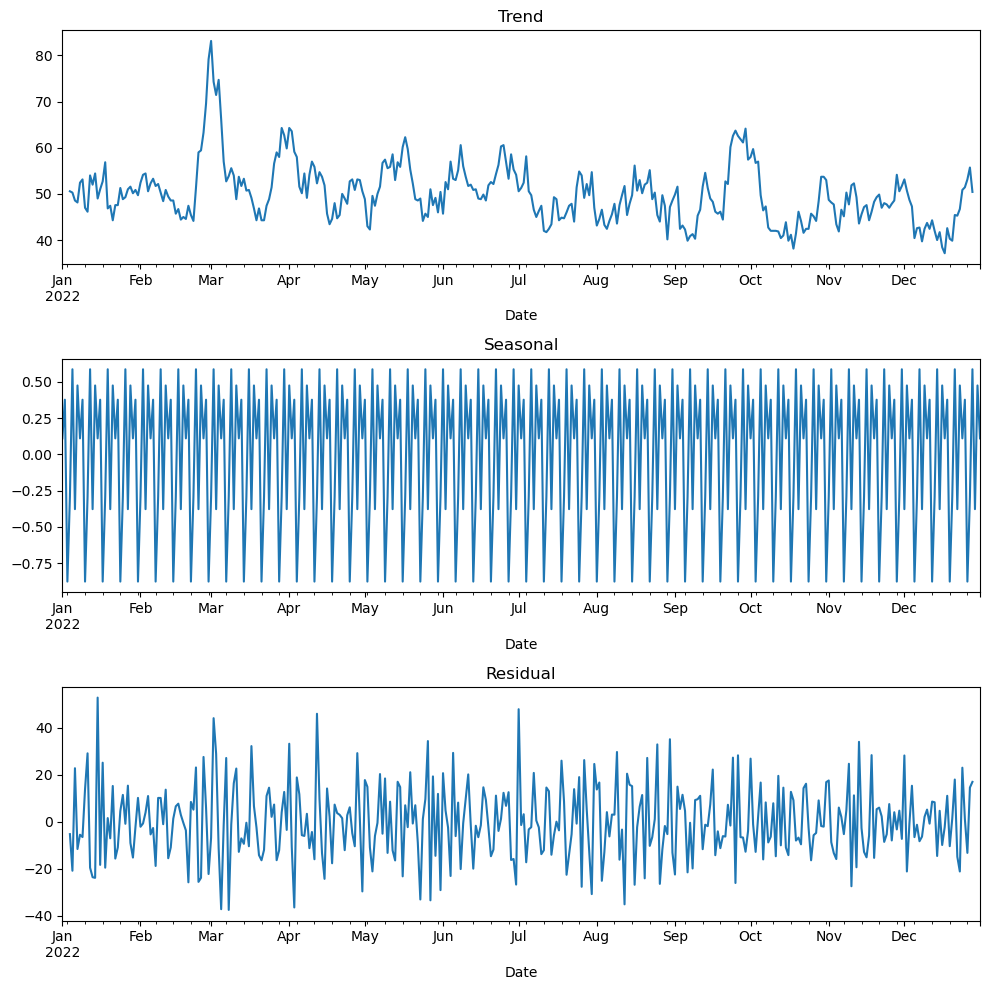

In [15]:
# Decomposition Analysis (Trend, Seasonal, Residual)
decomposed = seasonal_decompose(df_regression.set_index('Date'))

plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')

plt.tight_layout()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

# Uji ADF pada kolom 'Qty' dari DataFrame 'df_regression'
result = adfuller(df_regression['Qty'])

# Menampilkan hasil uji ADF
print('Augmented Dickey-Fuller Test Results:')
print('ADF Statistic: %.4f' % result[0])
print('p-value: %.4f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.4f' % (key, value))

# Menyimpulkan hasil uji berdasarkan p-value
if result[1] <= 0.05:
    print('\nHasil uji menunjukkan bahwa data adalah stasioner (Reject H0)')
else:
    print('\nHasil uji menunjukkan bahwa data bukan stasioner (Fail to Reject H0)')

Augmented Dickey-Fuller Test Results:
ADF Statistic: -19.4481
p-value: 0.0000
Critical Values:
	1%: -3.4484
	5%: -2.8695
	10%: -2.5710

Hasil uji menunjukkan bahwa data adalah stasioner (Reject H0)


In [17]:
# split into training and testing data
split_size = round(df_regression.shape[0] * 0.8)

df_train = df_regression.iloc[:split_size]
df_test = df_regression.iloc[split_size:].reset_index(drop=True)

df_train.shape, df_test.shape

((292, 2), (73, 2))

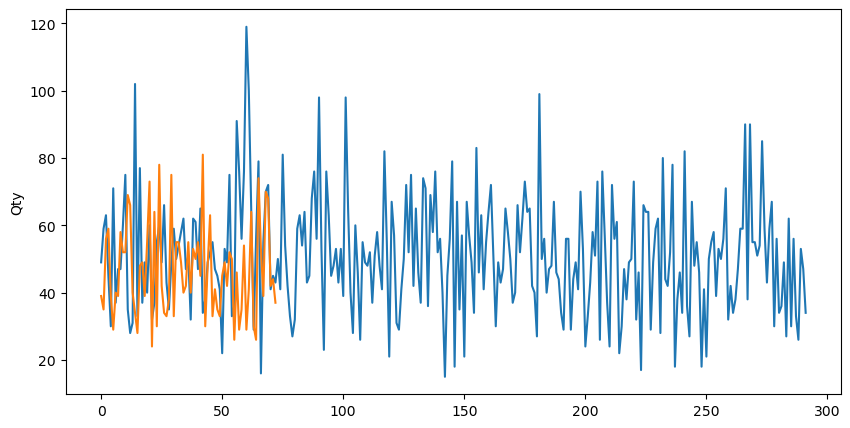

In [18]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_train, x=df_train.index, y=df_train['Qty'])
sns.lineplot(data=df_test, x=df_test.index, y=df_test['Qty'])

plt.show()

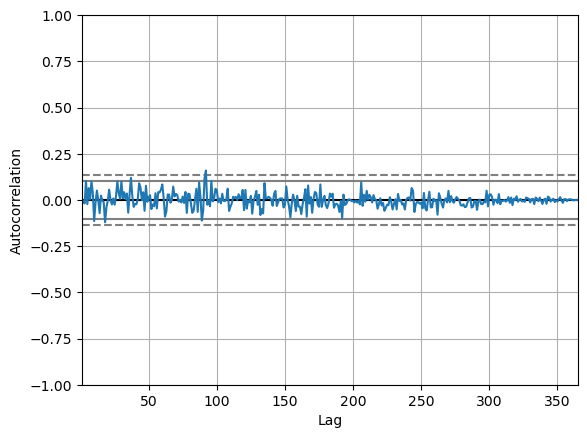

In [19]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_regression['Qty']);

In [20]:
# import sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
%matplotlib inline
# grid search for p, d, and q
auto_arima_model = pm.auto_arima(
    df_train['Qty'], 
    seasonal=False, 
    stepwise=False, 
    suppress_warnings=True, 
    trace = True
)
auto_arima_model.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3158.558, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2971.825, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2858.751, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2818.103, Time=0.17 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2758.656, Time=0.22 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2742.865, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2688.721, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2504.937, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2506.794, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2508.733, Time=0.48 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2510.161, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2616.108, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2506.798, Time=0.33 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1249.469
Date:                Sun, 01 Oct 2023   AIC                           2504.937
Time:                        09:18:10   BIC                           2515.968
Sample:                             0   HQIC                          2509.356
                                - 292                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.08e-05   3.25e+04      0.000       1.000       1.000
ma.L1         -0.9898      0.015    -66.555      0.000      -1.019      -0.961
sigma2       298.6880     22.254     13.422      0.000     255.071     342.305
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                18.30
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.53
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#import sarimax
p, d, q = auto_arima_model.order
model = SARIMAX(df_train['Qty'].values, order=(p,d,q))
model_fit = model.fit(disp=False)

In [22]:
# Set the index for df_train and df_test
df_train = df_train.set_index(['Date'])
df_test = df_test.set_index(['Date'])
#count rsme
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1)
rmse = mean_squared_error(df_test, predictions, squared=False)
rmse

14.153770427924957

In [23]:
# forecasting for next 90 days
period = 90
forecast = model_fit.forecast(steps=period)
index = pd.date_range(start='01-01-2023', periods=period)
df_forecast = pd.DataFrame(forecast, index=index, columns=['Qty'])

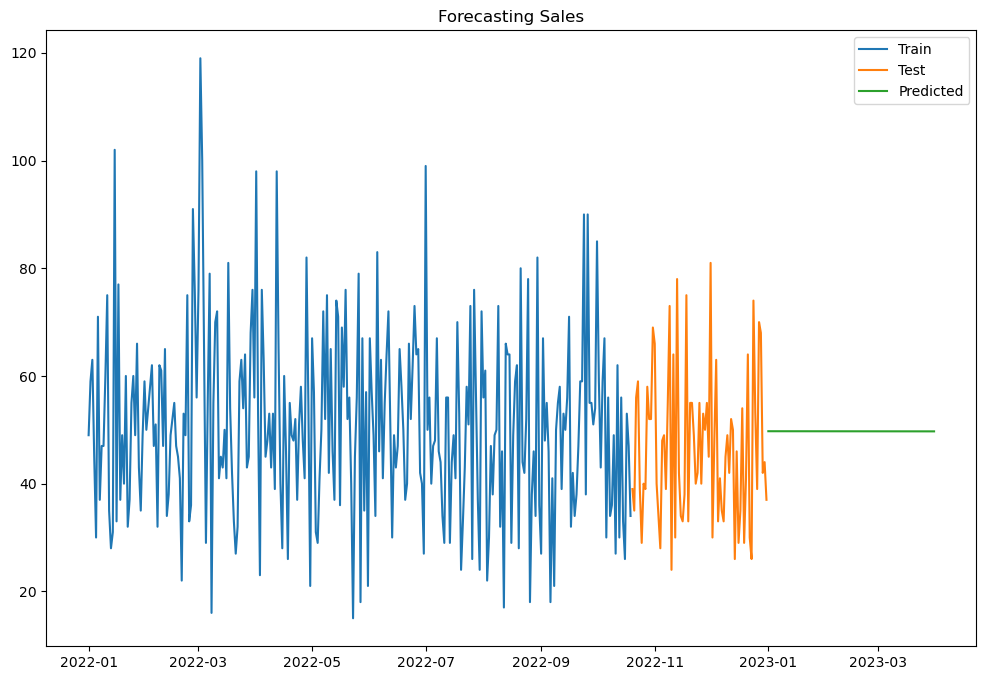

In [24]:
plt.figure(figsize=(12,8))
plt.title('Forecasting Sales')
plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')
plt.plot(df_forecast, label='Predicted')
plt.legend(loc='best')
plt.show()

<Axes: title={'center': 'Forecasting Sales'}, xlabel='Date', ylabel='Total Qty'>

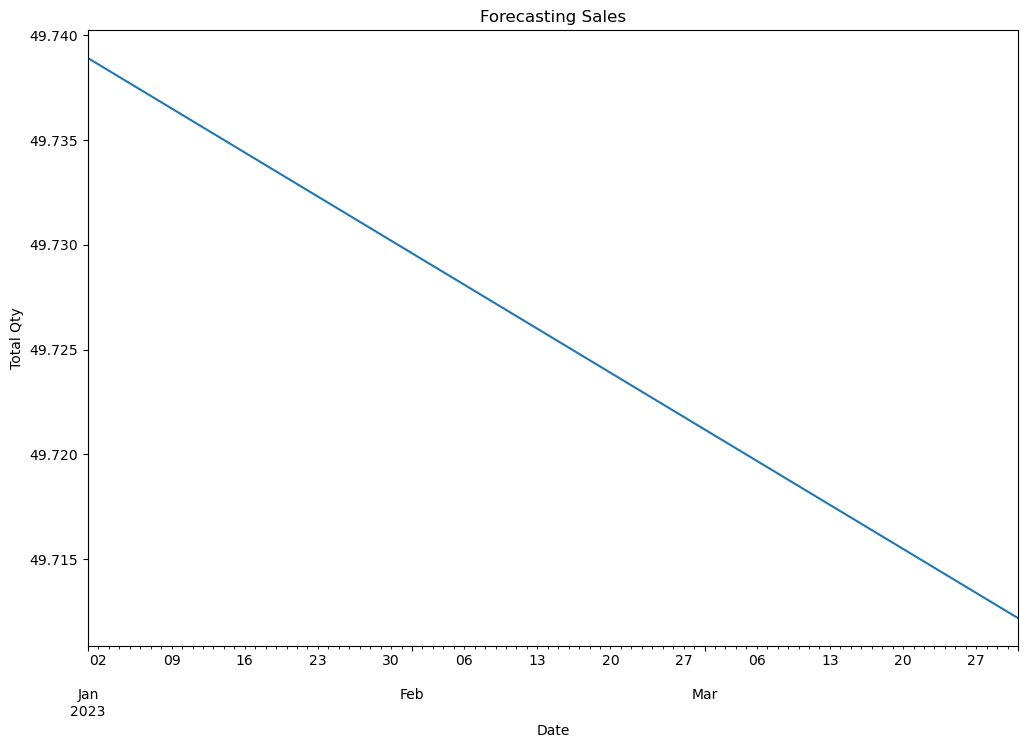

In [25]:
# plot forecast
df_forecast.plot(figsize=(12,8), title='Forecasting Sales', xlabel='Date', ylabel='Total Qty', legend=False)

In [26]:
# forecast product for next 90 days
warnings.filterwarnings('ignore')

product_reg_df = merged_df[['Qty', 'Date', 'Product Name']]
new = product_reg_df.groupby("Product Name")

forecast_product_df = pd.DataFrame({'Date': pd.date_range(start='2023-01-01', periods=90)})

for product_name, group_data in new:
    target_var = group_data['Qty']
    model = SARIMAX(target_var.values, order=(p,d,q))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(90)
    forecast_product_df[product_name] = forecast

forecast_product_df.set_index('Date', inplace=True)
forecast_product_df

,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt
Date,,,,,,,,,,
2023-01-01,2.372072,2.968090,6.063319,4.014387,3.512555,4.952870,1.988850,2.798594,3.430684,4.019677
2023-01-02,2.372040,2.968090,6.063319,4.014387,3.512555,4.952870,1.988850,2.798594,3.430680,4.019677
2023-01-03,2.372007,2.968090,6.063319,4.014386,3.512555,4.952870,1.988850,2.798594,3.430676,4.019677
2023-01-04,2.371974,2.968090,6.063319,4.014386,3.512555,4.952870,1.988850,2.798594,3.430672,4.019677
2023-01-05,2.371942,2.968090,6.063319,4.014386,3.512555,4.952870,1.988850,2.798593,3.430668,4.019677
...,...,...,...,...,...,...,...,...,...,...
2023-03-27,2.369294,2.968087,6.063309,4.014350,3.512546,4.952862,1.988845,2.798584,3.430357,4.019665
2023-03-28,2.369261,2.968087,6.063309,4.014349,3.512546,4.952862,1.988845,2.798584,3.430353,4.019665
2023-03-29,2.369229,2.968087,6.063309,4.014349,3.512546,4.952862,1.988845,2.798584,3.430349,4.019665


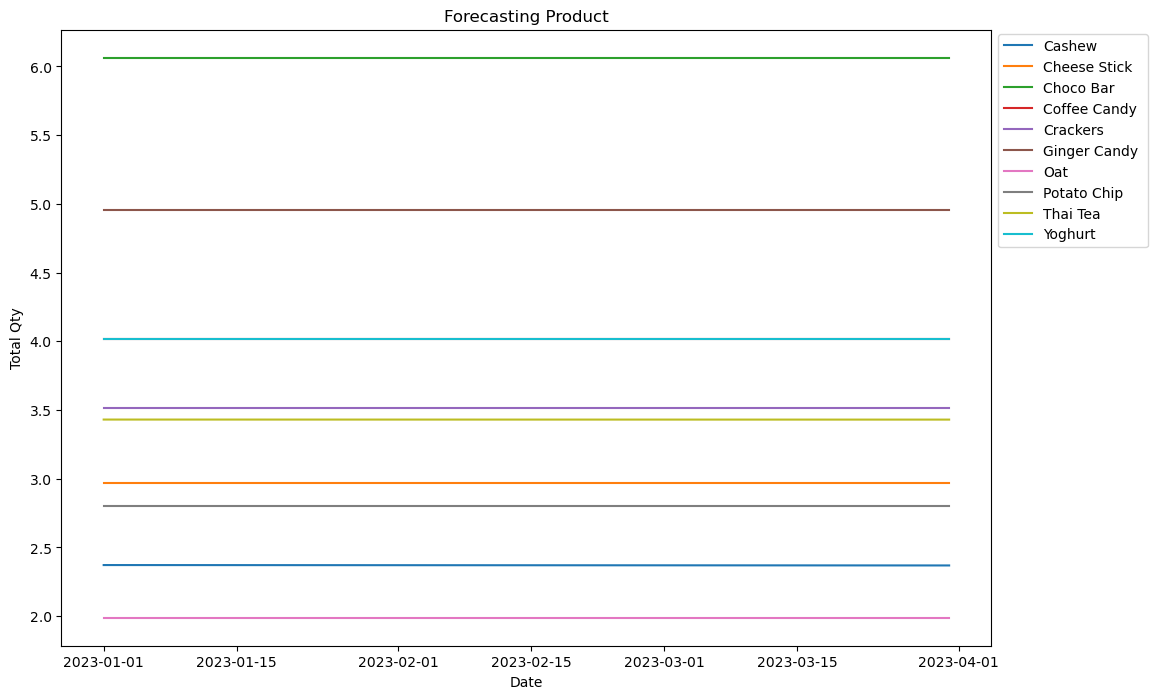

In [27]:
# plot forecast for products
plt.figure(figsize=(12,8))
for i in forecast_product_df.columns:
    plt.plot(forecast_product_df[i], label=i)
plt.legend(loc=6, bbox_to_anchor=(1,.82))
plt.title('Forecasting Product')
plt.xlabel('Date')
plt.ylabel('Total Qty')
plt.show()

In [28]:
#CLUSTERING
# Membuat data baru untuk clustering, yaitu groupby by customerID lalu yang di aggregasi
df_cluster = merged_df.groupby('CustomerID').agg({'TransactionID': 'count','Qty': 'sum','TotalAmount': 'sum'}).reset_index()
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [29]:
#Normalize
from sklearn.preprocessing import normalize

data_cluster = df_cluster.drop(columns=['CustomerID'])
data_cluster_normalize = normalize(data_cluster)
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [30]:
#use Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init=1).fit(data_cluster_normalize)
    fits.append(model)
    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

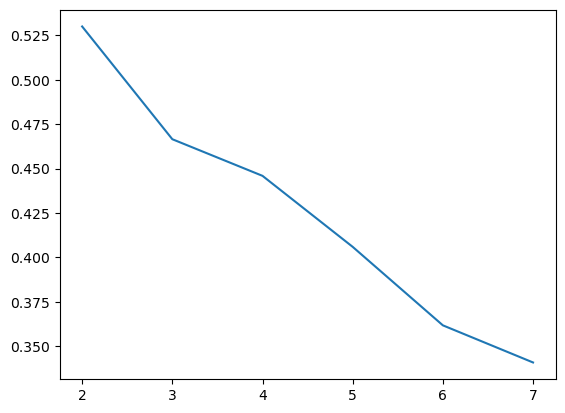

In [31]:
# Visualisasi silhouette score 
sns.lineplot(x = K, y = score);

In [32]:
fits[2]
print(fits[2])

df_cluster['cluster label'] = fits[2].labels_

# Mengelompokkan DataFrame
df_cluster.groupby(['cluster label']).agg({'CustomerID':'count',
                                           'TransactionID' : 'mean', 
                                           'Qty': 'mean',
                                           'TotalAmount' : 'mean'})

KMeans(n_clusters=4, n_init=1, random_state=0)


,CustomerID,TransactionID,Qty,TotalAmount
cluster label,,,,
0,164,10.969512,41.146341,345989.024390
1,90,10.866667,40.766667,292478.888889
2,189,11.714286,41.063492,414694.708995
3,4,7.250000,29.500000,150100.000000


<Figure size 300x300 with 0 Axes>

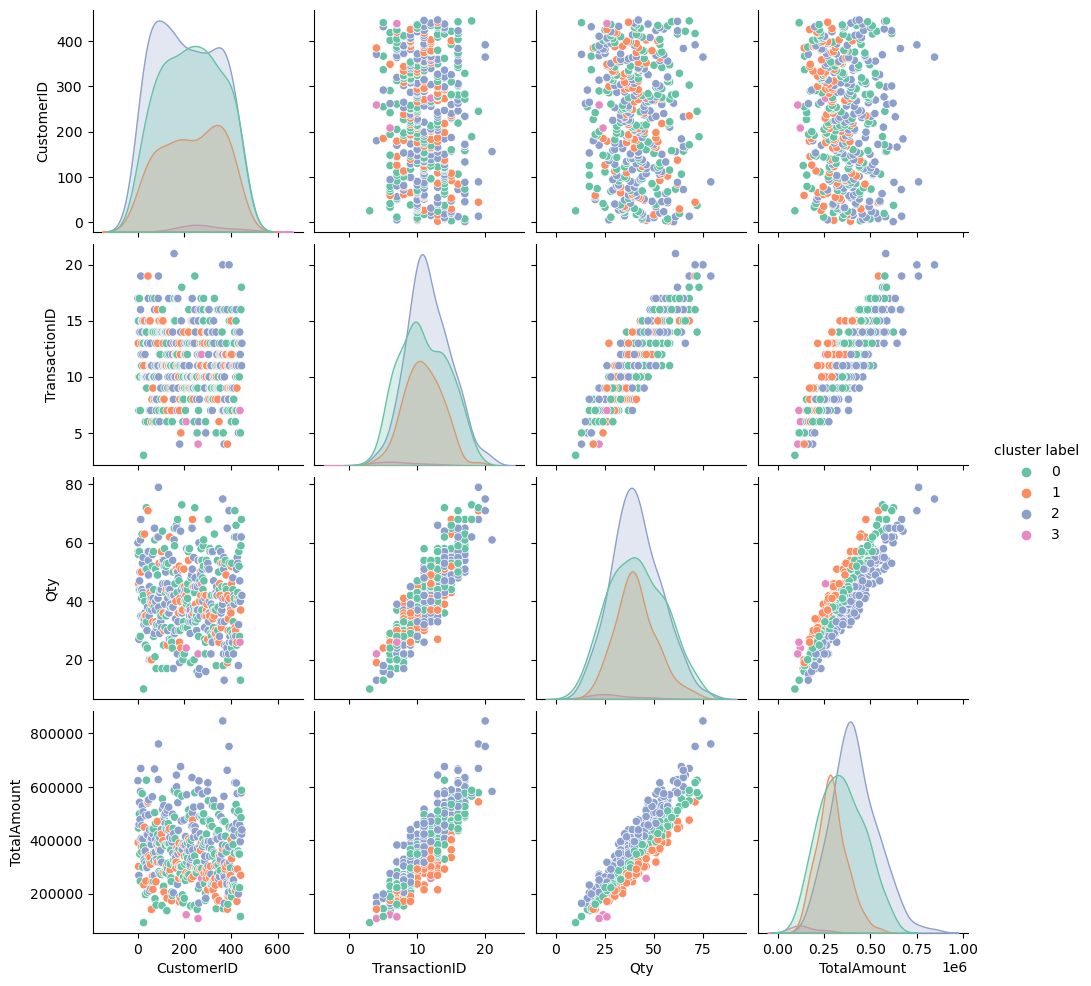

In [34]:
#Visualisasi clustering
plt.figure(figsize=(3,3))
sns.pairplot(data=df_cluster,hue='cluster label',palette='Set2')
plt.show()